<a href="https://colab.research.google.com/github/Swastik02aug/almabetter-EDA-project/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

* **Importing all required library**

In [ ]:
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


* **Mounting drive to collable to read csv files ,uploaded on drive**

In [ ]:
#mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# initialising path for file
file_path_1='/content/drive/MyDrive/EDA PROJECT/Play Store Data.csv'
file_path_2='/content/drive/MyDrive/EDA PROJECT/User Reviews.csv'

In [ ]:
#reading csv files
psd=pd.read_csv(file_path_1)
ur=pd.read_csv(file_path_2)

* **Analysing  Of data** 

In [ ]:
#'.head() is used to print five rows and all columns by default.
psd.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# here we get the data type of psd data frame
type(psd)

pandas.core.frame.DataFrame

In [ ]:
# here we get the data type in in each columns
psd.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
# here we find no. of unique values in columns
psd.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [ ]:
#'.info() ' is used to give all information about data frame and theirs values
psd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
#  here we finding the null places in each column
psd.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
psd.shape

(10841, 13)

* **Cleaning of Null type data**

In [ ]:
# on the basis of above data now we can clean the data
# as from data there are only one missing data in 'type ' so we replace the misssing place with  'free'.
psd['Type'].fillna("Free", inplace = True)

#in 'content rating' there is one  missing place, we can't replce with any other random value so its beneficial for us to drop that this row.
psd.dropna(subset = ['Content Rating'], inplace=True)

# there are some columns also which is not reqiured for data analysis so it is better to drop that columns.
psd.drop(['Last Updated'], axis=1, inplace=True)

# there are also null value in current and android version ,so we replace NaN value by string'not availavble' and '0'.
psd['Current Ver'] =psd['Current Ver'].replace({np.nan:'not available'})
psd['Android Ver'] =psd['Android Ver'].replace({np.nan:'not available'})
psd['Rating'] =psd['Rating'].replace({np.nan:0})


In [ ]:
# again we check data for null values
psd.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Current Ver       0
Android Ver       0
dtype: int64

* **Converting some specifics columns data types to some required data types**

In [ ]:
''' Now we covert the data types a/c to its requirement(Rating,	Reviews, 	Size,  Installs,  Price)'''


# hence reviews contains int and floats ,we convert all in int.
psd['Reviews']=psd['Reviews'].astype(int)


In [ ]:
#here we checking the size columns ,that what are types of values it contain a/c to that we remove or replace data and than converted to other data type
psd['Size'].unique()

# it conatains (M,Varies with device,  ','   ,  K,  +)

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:

#size contains various types of symbols,so we have to remove it ,after that we can change data type
psd['Size'] = psd.Size.apply(lambda x: x.strip('+'))

#  removing the `,`
psd['Size'] = psd.Size.apply(lambda x: x.replace(',', ''))

# converting the M to Mega
psd['Size'] = psd.Size.apply(lambda x: x.replace('M', 'e+6'))

# convertinf the K to Kilo
psd['Size'] = psd.Size.apply(lambda x: x.replace('k', 'e+3'))

# removing string by null values
psd['Size'] = psd.Size.replace('Varies with device', 0)

# Converting the string to Numeric type
psd['Size'] = pd.to_numeric(psd['Size'])

# finally we drop the null value rows
psd.dropna(subset = ['Size'], inplace=True)



In [ ]:
# '.describe()' is used to give all those columns whoes contain only int and float values.
mean=psd.describe().loc['mean','Size']

In [ ]:
# here we replacing  the o with mean values
psd['Size'] = psd.Size.replace(0,mean)

In [ ]:
# here we checking install columns ,that  is contains some symbol(+ and ,)
psd['Installs'].unique()


array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [ ]:
#here we removing (+)
psd['Installs'] = psd.Installs.apply(lambda x: x.strip('+'))
#here we replacing (, by space)
psd['Installs'] =psd.Installs.apply(lambda x: x.replace(',', ''))
# here we convert the data type 
psd['Installs']=psd['Installs'].astype(int)

In [ ]:
# here we checking  data of price columns,and it conatin($) symbols.
psd['Price'].unique()


array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:
#here we remove '$' symbol from price
psd['Price'] = psd.Price.apply(lambda x: x.strip('$'))

# now here we convert the datatype of price
psd['Price']=psd['Price'].astype(float)

* **Again Analysing of Data**

In [ ]:
psd.shape

(10840, 12)

In [ ]:
psd.describe()

,Rating,Reviews,Size,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,1.084000e+04,10840.000000
mean,3.621771,4.441529e+05,2.099045e+07,1.546434e+07,1.027368
std,1.514563,2.927761e+06,2.078345e+07,8.502936e+07,15.949703
min,0.000000,0.000000e+00,8.500000e+03,0.000000e+00,0.000000
25%,3.700000,3.800000e+01,5.900000e+06,1.000000e+03,0.000000
50%,4.200000,2.094000e+03,1.800000e+07,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,2.600000e+07,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000


In [ ]:
#now each columns are coverted into specified data types
psd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Current Ver     10840 non-null  object 
 11  Android Ver     10840 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 1.1+ MB


In [ ]:
#by using function '.tail()' we display the last five rows with all columns
psd.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,5.300000e+07,5000,Free,0.0,Everyone,Education,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.600000e+06,100,Free,0.0,Everyone,Education,1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,0.0,3,9.500000e+06,1000,Free,0.0,Everyone,Medical,1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,1.815209e+07,1000,Free,0.0,Mature 17+,Books & Reference,Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,1.900000e+07,10000000,Free,0.0,Everyone,Lifestyle,Varies with device,Varies with device


In [ ]:
# '.columns' is use to give all name in a list
psd.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver'],
      dtype='object')

In [ ]:
#'.shape' is used to give information about numbers of rows and columns as (rows,columns)
psd.shape

(10840, 12)

* **Problems of Statements based on Data Analysis** 

**QUESTION 1**:Find the numbers of apps in each types of content rating ?

---



In [ ]:
# here we stroing content rating values in y2 and index in x2
x2 = psd['Content Rating'].value_counts().index
y2 = psd['Content Rating'].value_counts()
print(y2)

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64


In [ ]:
# here we store cotent rating categories in l1 and their count values in l2 list.
l1 = []
l2 = []
for i in range(len(x2)):
    l1.append(x2[i])
    l2.append(y2[i])

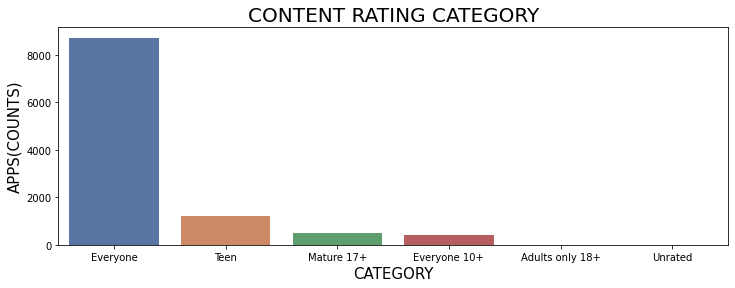

In [ ]:
#plot
plt.figure(figsize=(12,4))
graph = sns.barplot(x=l1,y=l2,alpha=1, palette= "deep")
#plt.bar(l1,l2,width=0.2,color='green', alpha=0.8);
plt.title('CONTENT RATING CATEGORY',size = 20);
plt.ylabel('APPS(COUNTS)',size=15);
plt.xlabel('CATEGORY',size=15); 

**INFERENCE**:Content rating category 'Everyone' contains most no. of apps fallowed by 'Teen' and 'Mature 17+'.

**QUESTION 2**:Find the numbers of apps in each category ?

In [ ]:
# here we store category values in y and index in x
x=psd['Category'].value_counts().index
y=psd['Category'].value_counts()
print(y)

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64


In [ ]:
l1=[]
l2=[]
for i in range(len(x)):
    l1.append(x[i])
    l2.append(y[i])
# here l1 store index value and l2 store count values in each category    

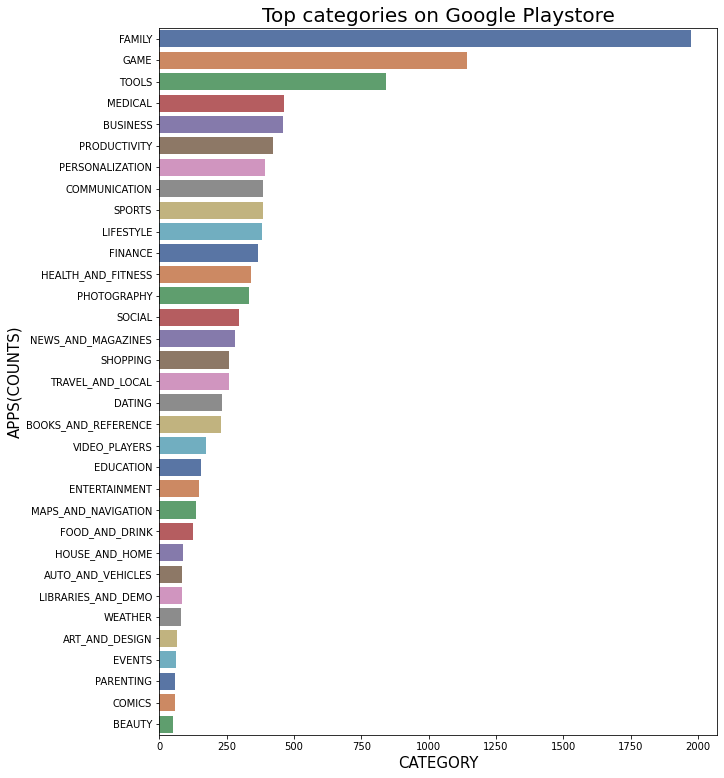

In [ ]:
#plot
plt.figure(figsize=(10,13))
plt.ylabel('APPS(COUNTS)',size=15);
plt.xlabel('CATEGORY',size=15); 
graph = sns.barplot(x=l2,y=l1,alpha=1, palette= "deep")
graph.set_title("Top categories on Google Playstore", fontsize = 20); 

**INFERENCE**:In category 'Family' contains the most numbers of apps fallowed by games,tools,medical etc.

**QUESTION 3**:Find the number of apps lies in free and paid category?

In [ ]:
# here we store type values in y and their ines in x
x=psd['Type'].value_counts(sort = True).index
y=psd['Type'].value_counts(sort = True)
print(y)

Free    10040
Paid      800
Name: Type, dtype: int64


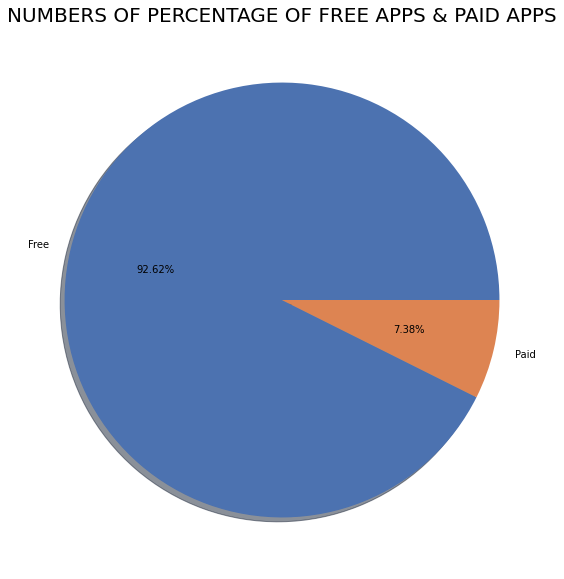

In [ ]:
#plot
plt.figure(figsize=(20,10))
colors = sns.color_palette('deep')[0:7]
plt.pie(y, labels =x, colors = colors, autopct='%.2f%%', shadow=True, startangle=0)
plt.title('NUMBERS OF PERCENTAGE OF FREE APPS & PAID APPS',size = 20)
plt.show()



**INFERENCE**:Numbers of percentages of 'Free' apps is much greater than the 'Paids' apps.

**QUESTION 4**:Find the over all distributrions rating?

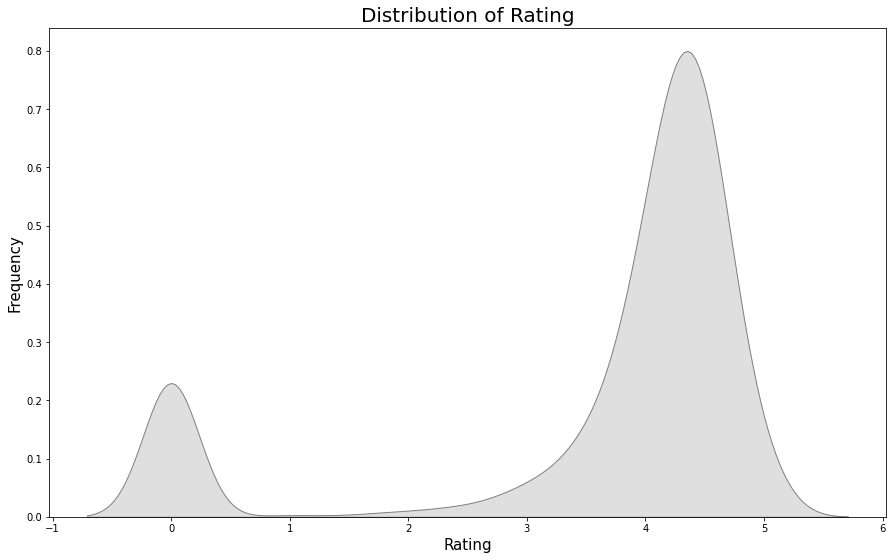

In [ ]:
#code
plt.figure(figsize=(15,9))
plt.xlabel("Rating",size = 15)
plt.ylabel("Frequency",size = 15)
graph = sns.kdeplot(psd.Rating, color='grey', shade = True)
plt.title('Distribution of Rating',size = 20);

**INFERENCE**:Maximum distributions of ratings is lie between ratings  4 to 5.

**QUESTION 5**:Find the numbers of count of each rating values?

In [ ]:
#here we storing all the values of rating in v.
v=psd['Rating'].value_counts()
u=v.rename('NO. OF OCCURANCE')
print(u)



0.0    1474
4.4    1109
4.3    1076
4.5    1038
4.2     952
4.6     823
4.1     708
4.0     568
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      64
2.9      45
2.8      42
2.7      25
2.6      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
1.7       8
1.8       8
2.1       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: NO. OF OCCURANCE, dtype: int64


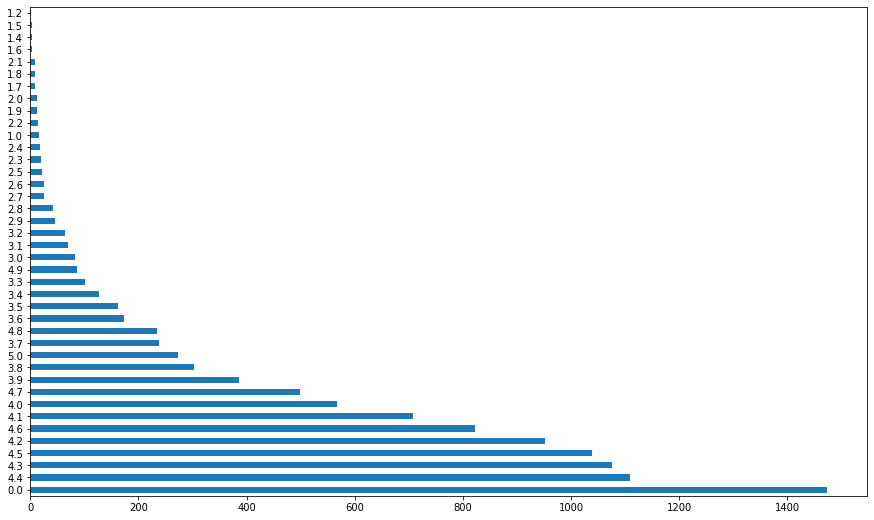

In [ ]:
# plot
plt.figure(figsize=(15,9))
v.plot.barh(x=v,stacked=True)

**INFERENCE**:Here we can't consider '0'  because every null values in ratings are replace by 0, so 4.4 rating hava maximum numbers of count .

**QUESTION 6**:Print top apps in user defined category ?

enter the category:Sports


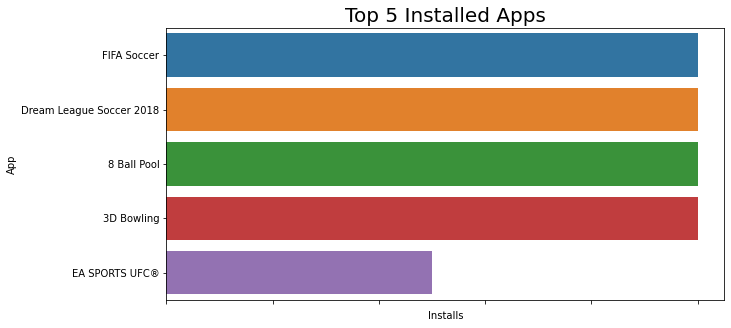

In [ ]:
#here we taking category name from user and storing their nyumbers of installation 
i =input('enter the category:')
i=i.upper()
top5 = psd[psd['Category'] == i]
top5apps = top5.sort_values(by='Installs', ascending=False).head() #it is used to print the top five apps w.r.t numbers of installations

# plot
plt.figure(figsize=(10,5))
plt.title('Top 5 Installed Apps',size = 20);    
graph = sns.barplot(x =top5apps.Installs , y = top5apps.App)
graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right',size=15);

**INFERENCE**:By taking  category name from users it provides top 5 apps in that category w.r.t. numbers of installations.

**QUESTION 7**.Which category of App's have most number of installs?

In [ ]:
#here we count the numbers of installation  in each category and print the top five category.
most_install= psd.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)
most_install.head()

,Installs
Category,
GAME,35086024415
COMMUNICATION,32647276251
PRODUCTIVITY,14176091369
SOCIAL,14069867902
TOOLS,11452771915


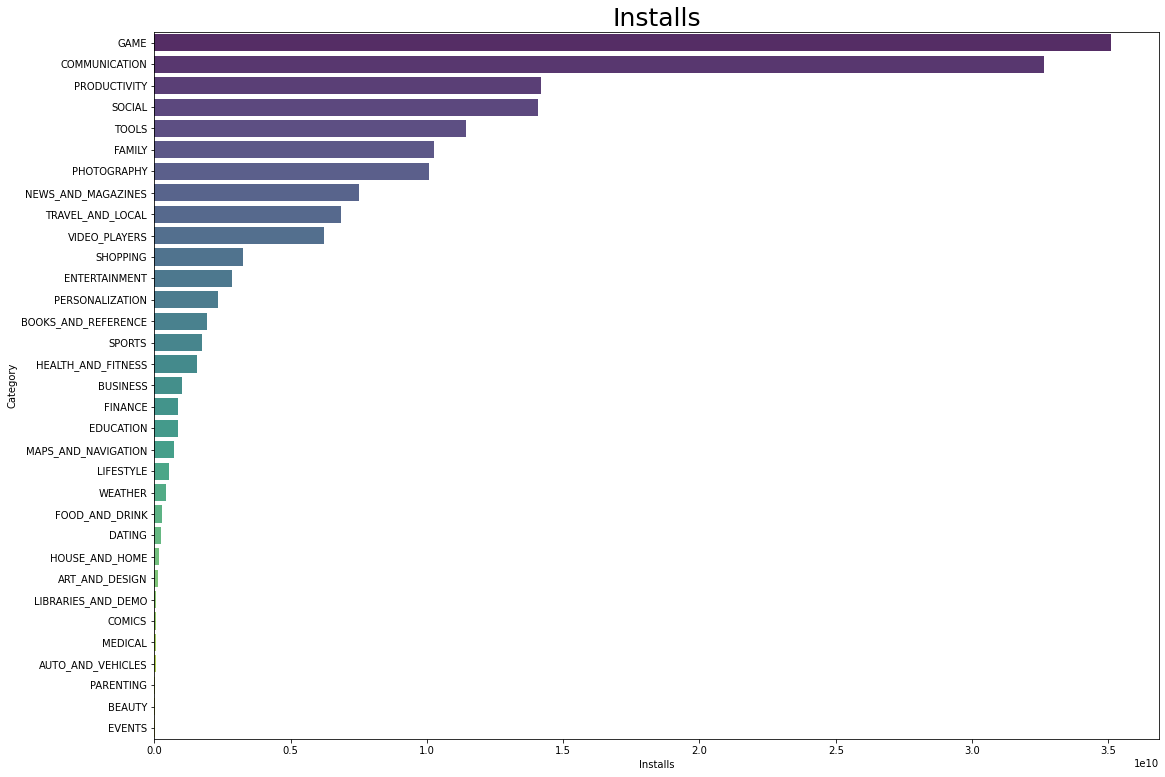

In [ ]:
#plot
x= []
y= []

for i in range(len(most_install)):
    x.append(most_install.Installs[i])
    y.append(most_install.index[i])

plt.figure(figsize=(18,13))

plt.xlabel("Installs")
plt.ylabel("Category")
graph = sns.barplot(x = x2sis, y = y2sis, alpha =0.9, palette= "viridis")
graph.set_title("Installs", fontsize = 25);

**INFERENCE**: From above dat find that category 'GAME' have maximum numbers of installations and fallowed by 'COMMUNICATION AD PRODUCTIVITY'.

**QUESTION 8**:Find the top 10 most expensive Apps in playstore and find the all details about most expensive apps?

In [ ]:
#here we sort the apps according to the price.
paid_apps = psd[psd['Type'] == 'Paid'].sort_values(by='Price', ascending=False).head(10)
paid_apps


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300000.0,10000,Paid,400.00,Everyone,Lifestyle,1.0.1,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965000.0,5000,Paid,399.99,Everyone,Finance,3.4,4.4 and up
5373,I AM RICH PRO PLUS,FINANCE,4.0,36,41000000.0,1000,Paid,399.99,Everyone,Finance,1.0.2,4.1 and up
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,0.0,0,40000000.0,0,Paid,399.99,Everyone,Lifestyle,MONEY,4.1 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700000.0,10000,Paid,399.99,Everyone,Entertainment,3.0,4.4 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800000.0,100000,Paid,399.99,Everyone,Lifestyle,2.0,4.0.3 and up
5358,I am Rich!,FINANCE,3.8,93,22000000.0,1000,Paid,399.99,Everyone,Finance,1.0,4.1 and up
5362,I Am Rich Pro,FAMILY,4.4,201,2700000.0,5000,Paid,399.99,Everyone,Entertainment,1.54,1.6 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000000.0,10000,Paid,399.99,Everyone,Lifestyle,1.0.0,4.4 and up
5364,I am rich (Most expensive app),FINANCE,4.1,129,2700000.0,1000,Paid,399.99,Teen,Finance,2,4.0.3 and up


In [ ]:
paid_apps_df= paid_apps[['App', 'Installs']].drop(9934)  # here we droping columns 9934 which conatain unwanted items
paid_apps_df

,App,Installs
4367,I'm Rich - Trump Edition,10000
5359,I am rich(premium),5000
5373,I AM RICH PRO PLUS,1000
5354,I am Rich Plus,10000
5351,I am rich,100000
5358,I am Rich!,1000
5362,I Am Rich Pro,5000
4362,💎 I'm rich,10000
5364,I am rich (Most expensive app),1000
5369,I am Rich,5000


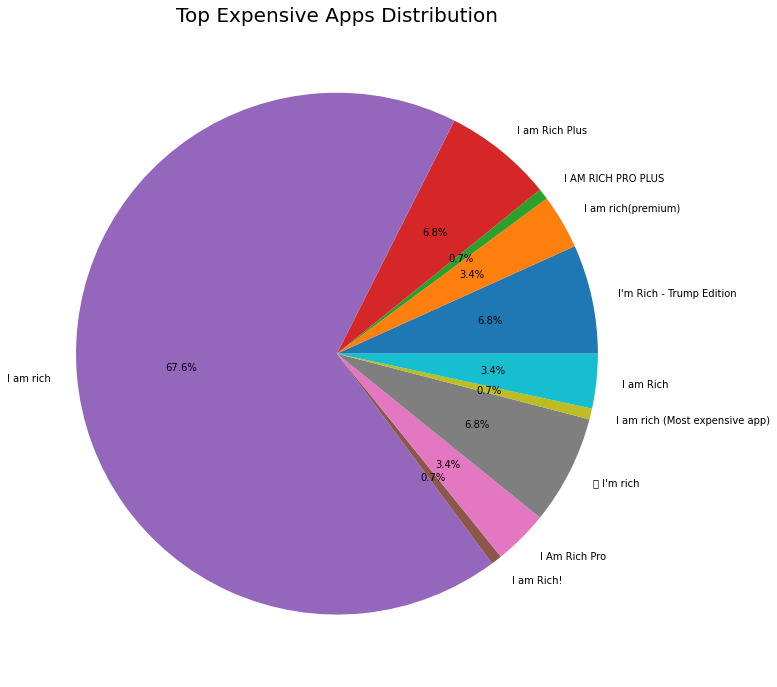

In [ ]:
plt.figure(figsize=(15,12))
plt.pie(x=paid_apps_df.Installs, explode=None, labels=paid_apps_df.App, autopct='%1.1f%%', startangle=0)
plt.title('Top Expensive Apps Distribution',size = 20)
graph.set_title("Top Expensive Apps Distribution", fontsize = 25);


In [ ]:
# here we slicing the top most expensive apps from top 10 most expensive apps
expensive_apps_details=paid_apps.iloc[:1]
expensive_apps_details

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300000.0,10000,Paid,400.0,Everyone,Lifestyle,1.0.1,4.1 and up


**INFERENCE:** 'I AM RICH'  is the most expansive apps on the play store fallowed by 'i am rich plus' , '  i am rich -trup edition'.

**QUESTION 9**:Find the top 20 Apps with highest number of reviews?


In [ ]:
# here we sorting the data frame w.r.t descending order of numbers of reviews.
highest_reviews = psd.sort_values(by='Reviews', ascending=False).head(20)
highest_reviews

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,1.815209e+07,1000000000,Free,0.0,Teen,Social,Varies with device,Varies with device
3943,Facebook,SOCIAL,4.1,78128208,1.815209e+07,1000000000,Free,0.0,Teen,Social,Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,1.815209e+07,1000000000,Free,0.0,Everyone,Communication,Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,1.815209e+07,1000000000,Free,0.0,Everyone,Communication,Varies with device,Varies with device
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,1.815209e+07,1000000000,Free,0.0,Everyone,Communication,Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,1.815209e+07,1000000000,Free,0.0,Teen,Social,Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,1.815209e+07,1000000000,Free,0.0,Teen,Social,Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313,1.815209e+07,1000000000,Free,0.0,Teen,Social,Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,1.815209e+07,1000000000,Free,0.0,Teen,Social,Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,1.815209e+07,1000000000,Free,0.0,Everyone,Communication,Varies with device,Varies with device


**INFERENCE**:The most reviews apps is 'FACEBOOK' fallowed by 'WHATSAPP','INSTAGRAM' etc..

**QUESTION 10**:Find the numbers of Apps in different genres?

In [ ]:
#  there are 61 types of genere  ,plotting all on a plot is very hazy so we plot upto 30 only.
genere= psd['Genres'].value_counts().head(30)


In [ ]:
x = []
y = []

for i in range(len(genere)):
    x.append(genere.index[i])
    y.append(genere[i])

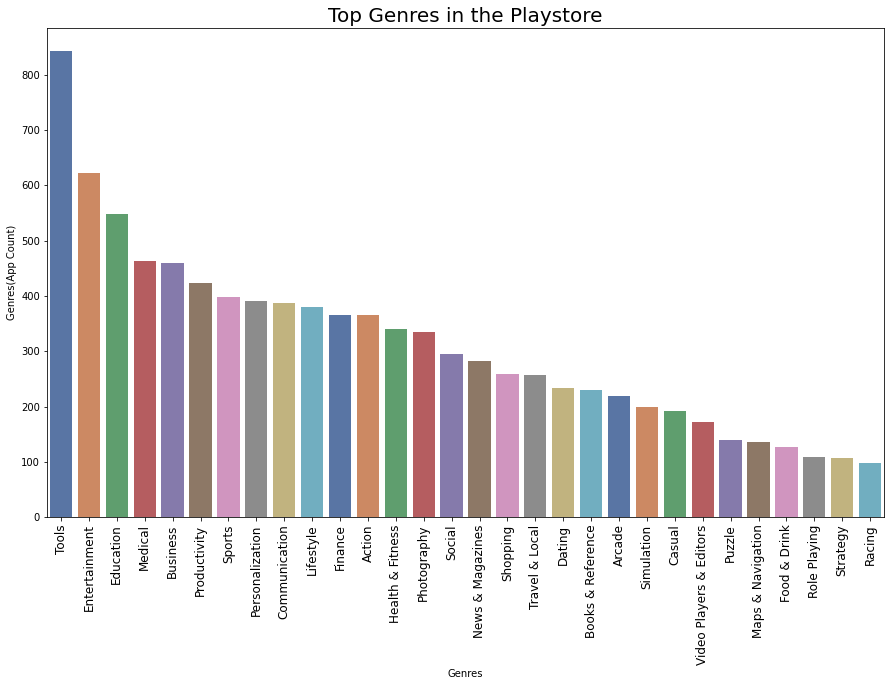

In [ ]:
# plot
plt.figure(figsize=(15,9))
plt.ylabel('Genres(App Count)')
plt.xlabel('Genres')
graph = sns.barplot(x=x,y=y,palette="deep")
graph.set_xticklabels(graph.get_xticklabels(), rotation=90, fontsize=12)
graph.set_title("Top Genres in the Playstore", fontsize = 20);

**INFERENCE**: 'TOOLS' contain more numbers of apps and followed by 'entertainment','education','medical' ,'busines' etc.

**QUESTION 11**:Find the apps rating of top five  highest earning apps?


In [ ]:
paid_app = psd[psd['Type'] == 'Paid']
earn =paid_app.loc[:,('App', 'Installs', 'Price')]
earn['Earnings'] = earn['Installs'] * earn['Price'];
sorted_earn = earn.sort_values(by='Earnings', ascending=False).head(10)
sorted_price= sorted_earn.sort_values(by='Price', ascending=False)


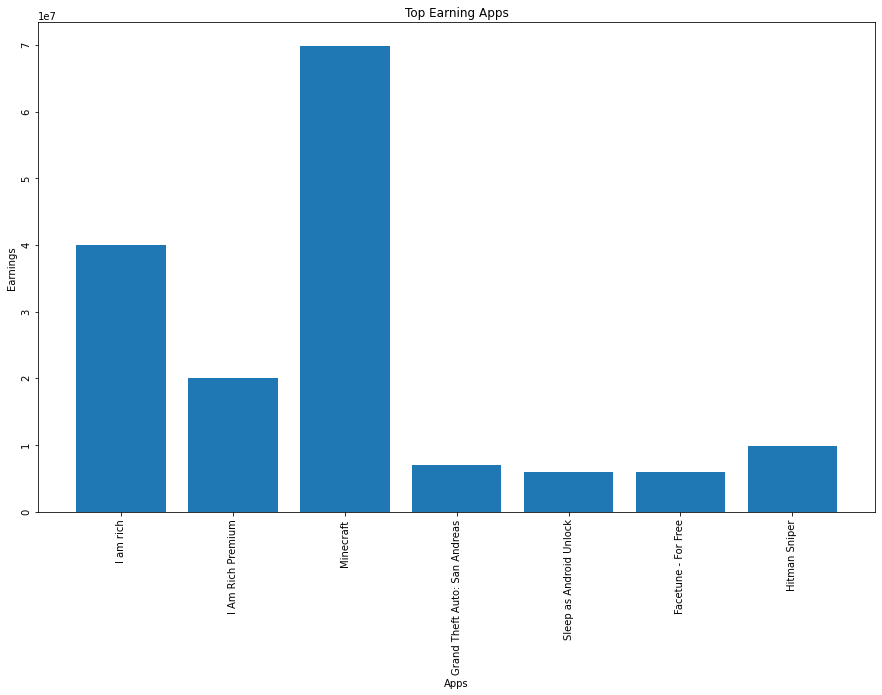

In [ ]:
# PLot a bar chart of earning at y and app names at x
plt.figure(figsize=(15,9))
plt.bar(sorted_price.App,sorted_price.Earnings,  label=sorted_price.Earnings)
plt.xlabel("Apps")
plt.ylabel("Earnings")
plt.tick_params(rotation=90)
plt.title("Top Earning Apps");

**INFERENCE**:The most expensive apps 'I AM RICH 'got the 4 star and fallowed by 'I AM RICH PREMIUM' got 2 star ratings.

**QUESTION.12**:Find the correlations between the variables given in data of play store ?

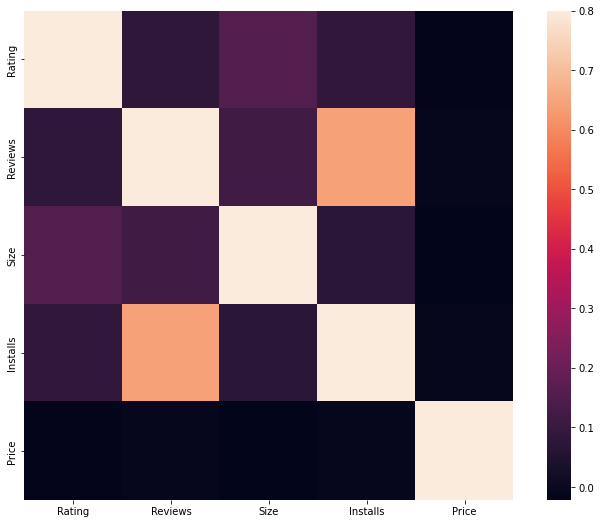

In [ ]:
#here we plot corelation between all columns data which will affects the apps popularity and demands.
corrmat =psd.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

**INFERENCE:**Frome the above problems we find the correlations between various(price,installs,size,reviews,and rating) factors which affects the apps popularity and their demands.

* **SUMMARY**:

Initially I started with looking at each database available to us for the Play Store App Review Analysis Capstone Project. I went through various columns available within each of the database tried to make sense of what all data is available to us. 
I took ‘deliveries.csv’ and understood that it contained details of apps across various columns values. I quickly understood this, some data that contain some null values in that. And I also found various data types which are need to be a specifics data so that analysis could be done on that easily. I also tried looking into columns values data types and there some actions like replacing data, removing data, and also converting data from one data type to another can be done. Content rating category 'Everyone' contains large number of apps followed by 'Teen' and 'Mature 17+'. In categories 'Family' contains the large number of apps followed by games, tools, medical etc. Numbers of percentage of 'Free' apps is much greater than the ' Paid ' apps. Maximum distributions of ratings are lies between ratings 4 to 5. Here we can't consider '0' because every null values in rating replace by 0, so 4.4 rating have maximum numbers of counts. By taking category name from user it provides top 5 apps in that category with numbers of installations. From above data find that category 'GAME' contains maximum numbers of installations and followed by 'COMMUNICATION' AND 'PRODUCTIVITY'. 'I AM RICH' is the most expansive apps on the play store followed by 'i am rich plus ' , ' i am rich -trump edition'. The most reviews apps are 'FACEBOOK' followed by 'WHATSAPP','INSTAGRAM' etc. 'TOOLS' contains large number of apps and followed by 'entertainment' , ' education' ,'medical' ,'business' etc. The most expensive apps 'I AM RICH 'got the four stars and followed by 'I AM RICH PREMIUM' got 2 stars rating. From the above problems we find the correlations between various (price, installs, size, reviews and rating) factors which affect the apps popularity and their demands.

